# EARLY DEMENTIA PREDICTION


The dataset for this project was derived from Kaggle.The features in this dataset are being used as key indicators that can be used in the prediction of dementia.Necessary packages needed for the analysis and evaluation of the dataset were successfully imported. 


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import random
import seaborn as sns
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,f1_score
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import StratifiedKFold, cross_validate
import warnings
warnings.filterwarnings("ignore")

# The dataset was loaded successfully using the pandas package and it was csv file was read

In [2]:
#Loading the Dataset
di = pd.read_csv('OPTIMAL_combined_3studies_6feb2020.csv')
di

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,female,0.0,0,13.0,-0.100000,-0.020000,-0.260000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,0,Zero,0
1838,990,71.00,female,0.0,0,13.0,-0.370000,-1.060000,-1.003333,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0
1839,991,55.00,male,0.0,0,10.0,0.460000,0.960000,0.610000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0
1840,995,54.00,male,0.0,0,10.0,0.190000,0.030000,0.590000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,1,Zero,0


In [3]:
# Create age range bins
#bins = [0, 18, 25, 40, 100]
#labels = ['Youth', 'Young Adult', 'Adult', 'Senior']

# Cut the age column into bins and label the bins
#di['AgeRange'] = pd.cut(di['age'], bins=bins, labels=labels)
#di

# DATA STRUCTURE AND STATISTICAL ANALYSIS


The structure of the dataset was printed as well in order to know the distribution of the dataset. The size, shape and number of rows and columns as well as the data type of every column was also visualized. The statistical measures of the dataset such as the mean, mode, standard deviation was also displayed.


In [4]:
#Checking the first 10n rows of the dataset
di.head(10)

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0
5,104,62.75,male,0.0,0,24.0,-0.380000,-1.110000,-0.526667,0,...,Yes,zero,2 to 3,scans,scans,0.0,2.0,2,Zero,0
6,105,76.00,male,0.0,0,19.0,0.610000,-0.403333,0.120000,0,...,Yes,zero,2 to 3,scans,scans,2.0,3.0,2,Zero,>=1
7,106,69.67,female,0.0,0,12.0,0.730000,0.793333,0.672000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0
8,107,53.75,male,1.0,1,12.0,-3.086667,-2.616667,-2.178000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
9,108,80.92,female,0.0,0,12.0,-0.060000,-0.100000,0.043000,0,...,Yes,zero,2 to 3,scans,scans,2.0,4.0,3,Zero,>=1


In [5]:
#Checking the last 10 rows of the dataset
di.tail(10)

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
1832,98,51.0,female,0.0,0,13.0,0.48,1.78,1.093333,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0
1833,980,53.0,female,0.0,0,13.0,0.71,-0.27,0.333333,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,1.0,1.0,0,Zero,>=1
1834,983,59.0,male,0.0,0,10.0,0.24,1.07,0.470000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0
1835,985,79.0,female,0.0,0,9.0,0.15,-0.45,-0.193333,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0
1836,986,61.0,female,0.0,0,10.0,0.43,1.06,0.480000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0
1837,989,67.0,female,0.0,0,13.0,-0.10,-0.02,-0.260000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,0,Zero,0
1838,990,71.0,female,0.0,0,13.0,-0.37,-1.06,-1.003333,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0
1839,991,55.0,male,0.0,0,10.0,0.46,0.96,0.610000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0
1840,995,54.0,male,0.0,0,10.0,0.19,0.03,0.590000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,1,Zero,0
1841,996,68.0,female,0.0,0,10.0,0.51,-0.53,-0.100000,0,...,Yes,more-than-zero,2 to 3,ASPS-elderly,ASPS,NaN,NaN,2,1 to 2,0


In [6]:
#CHECKING THE NUMBER OF ROWS AND COLUMNS
di.shape

(1842, 22)

In [7]:
#CHECKING THE SIZE OF THE DATASET
di.size

40524

In [8]:
#CHECKING FOR THE DATA TYPES IN THE DATASET
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   int64  
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

In [9]:
#CHECKING THE STATISTICAL MEASURES OF THE DATASET
di.describe()

,ID,age,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,SVD Simple Score,SVD Amended Score,Fazekas
count,1842.000000,1842.000000,1808.000000,1842.000000,1842.000000,1634.000000,1574.000000,1534.000000,1842.000000,1165.000000,1165.000000,1842.000000
mean,29897.929967,65.952588,0.045354,0.062975,11.139522,-0.063088,-0.066649,-0.026860,0.122693,0.719313,1.491845,1.311075
std,67056.874773,8.923488,0.208137,0.242984,2.983946,0.785264,0.871836,0.677071,0.328173,0.932063,1.623277,0.799495
min,1.000000,38.000000,0.000000,0.000000,1.000000,-5.200000,-2.680000,-2.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,60.000000,0.000000,0.000000,9.000000,-0.436896,-0.670805,-0.476881,0.000000,0.000000,0.000000,1.000000
50%,612.500000,66.151393,0.000000,0.000000,10.000000,0.130000,-0.020000,0.006667,0.000000,0.000000,1.000000,1.000000
75%,1713.250000,73.000000,0.000000,0.000000,13.000000,0.484327,0.550000,0.423333,0.000000,1.000000,2.000000,2.000000
max,211301.000000,90.000000,1.000000,1.000000,24.000000,2.350000,2.730000,1.853333,1.000000,3.000000,7.000000,3.000000


# DATA PREPROCESSING 

The number of duplicated values as well as the number of missing values were also printed, and it was established that there were neither any missing nor duplicated values.

In [10]:
#CHECKING FOR DUPLICATE VALUES
di.duplicated().sum()

0

In [11]:
#CHECKING THE COLUMNS  IN THE DATASET
di.columns

Index(['ID', 'age', 'gender', 'dementia', 'dementia_all', 'educationyears',
       'EF', 'PS', 'Global', 'diabetes', 'smoking', 'hypertension',
       'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'study1',
       'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'lac_count',
       'CMB_count'],
      dtype='object')

In [12]:
#CHECKING FOR THE NUMBER OF MISSING VALUES IN THE DATASET
di.isnull().sum()

ID                        0
age                       0
gender                    0
dementia                 34
dementia_all              0
educationyears            0
EF                      208
PS                      268
Global                  308
diabetes                  0
smoking                  11
hypertension              0
hypercholesterolemia      0
lacunes_num               0
fazekas_cat               0
study                     0
study1                    0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
CMB_count                 0
dtype: int64

In [13]:
#Removing unnessecary columns

In [14]:
di.drop("dementia", axis=1, inplace=True)
di.drop("ID", axis=1, inplace=True)
di.drop("study1", axis=1, inplace=True)

In [15]:
#Dealing with missing values
di["EF"].fillna(di["EF"].median(), inplace=True)
di["PS"].fillna(di["PS"].median(), inplace=True)
di["Global"].fillna(di["Global"].median(), inplace=True)
di["SVD Simple Score"].fillna(di["SVD Simple Score"].median(), inplace=True)
di["SVD Amended Score"].fillna(di["SVD Amended Score"].median(), inplace=True)
di["smoking"].fillna(di["smoking"].mode(), inplace=True)

In [16]:
di.head()


,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,52.67,male,0,11.0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,more-than-zero,2 to 3,scans,3.0,7.0,3,>5,>=1
1,64.58,male,0,10.0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,more-than-zero,0 to 1,scans,2.0,3.0,1,1 to 2,>=1
2,74.92,male,0,8.0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,more-than-zero,0 to 1,scans,1.0,2.0,1,1 to 2,0
3,74.83,male,1,9.0,0.130000,-2.136271,-1.301102,0,current-smoker,Yes,Yes,more-than-zero,2 to 3,scans,2.0,4.0,2,3 to 5,0
4,79.25,male,0,10.0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,more-than-zero,2 to 3,scans,2.0,3.0,2,1 to 2,0


# EXPLORATORY DATA ANALYSIS AND VISUALIZATION



In order to gain better understanding of the trends and patterns of the dataset, the number of categorical and numerical columns were displayed as well as the number of unique values in both columns and they were finally visualized in order to get a visual presentation of the dataset.

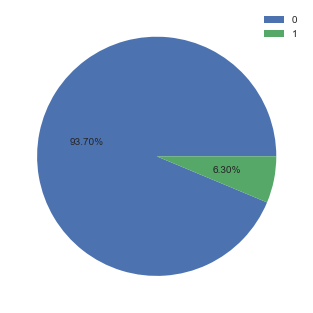

In [17]:
counts = di["dementia_all"].value_counts()
plt.pie(counts, autopct="%0.2f%%")
plt.legend(counts.index)
plt.show()

In [18]:
#CHECKING FOR THE NUMBER OF CATEGORICAL COLUMNS
cat = di.select_dtypes(include='object').columns
len(cat)

9

In [19]:
#CHECKING FOR UNIQUE VALUES IN THE CATEGORICAL COLUMNS
for i in cat:
    print("The no.of unique values in",i,"are: ",di.loc[:,i].nunique())

The no.of unique values in gender are:  2
The no.of unique values in smoking are:  3
The no.of unique values in hypertension are:  2
The no.of unique values in hypercholesterolemia are:  2
The no.of unique values in lacunes_num are:  2
The no.of unique values in fazekas_cat are:  2
The no.of unique values in study are:  4
The no.of unique values in lac_count are:  4
The no.of unique values in CMB_count are:  2


# UNIVARIATE ANALYSIS

A visual statistical analysis for all the categorical and numerical columns was generated in order to gain an understanding about its characteristics.

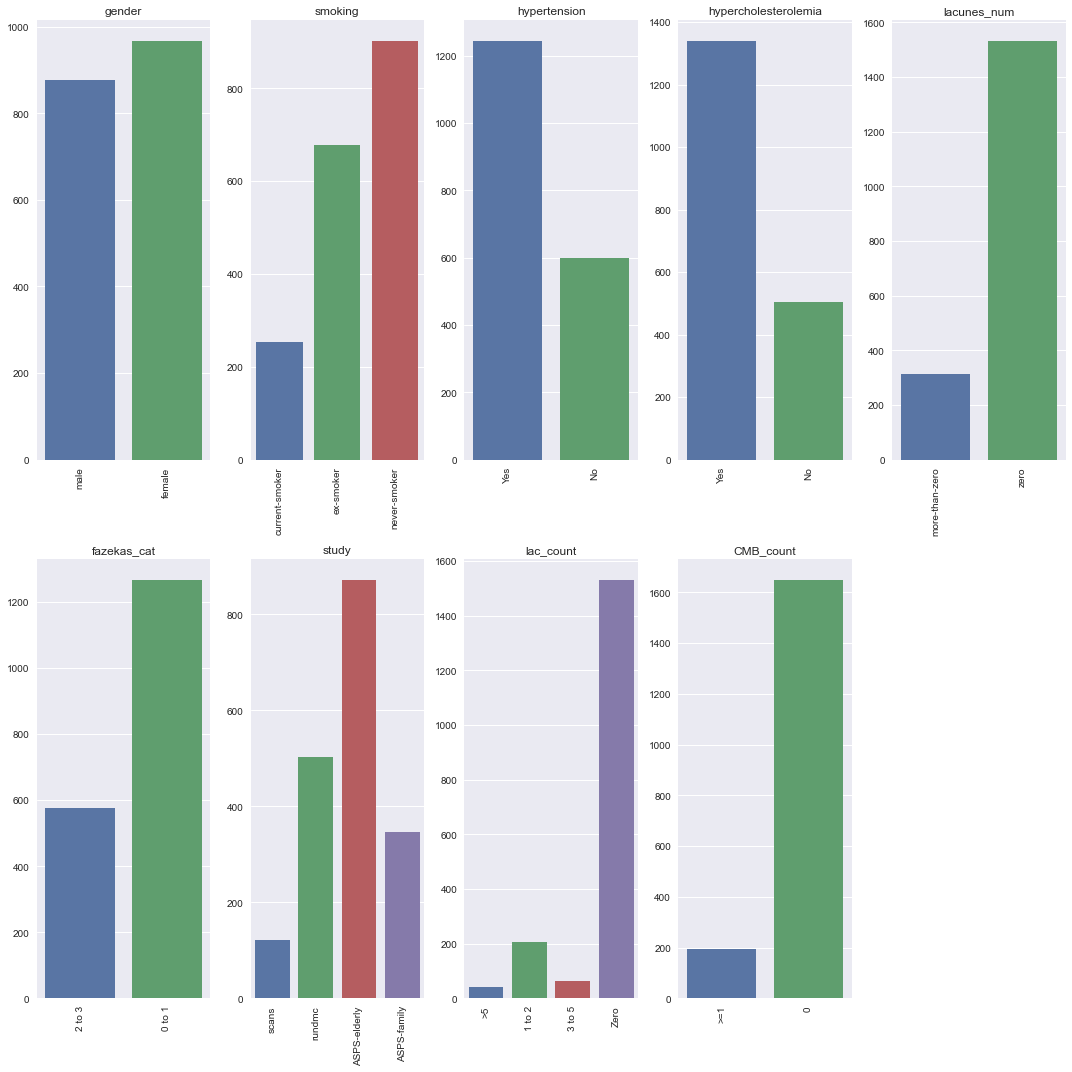

In [20]:
#visualizing categorical columns
num_plots = len(cat)
num_cols = 5
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(cat):
    sns.countplot(x=col, data=di, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=90)
for i in range(num_plots, num_rows*num_cols):
    axes[i].set_visible(False)
fig.tight_layout()
plt.show()

In [21]:
#CHECKING FOR THE NUMBER OF NUMERICAL VALUES
num = di.select_dtypes(include=np.number).columns
len(num)

10

In [22]:
#CHECKING FOR UNIQUE VALUES IN THE NUMERICAL COLUMNS
for i in num:
    print("The no.of unique values in",i,"are: ",di.loc[:,i].nunique())

The no.of unique values in age are:  630
The no.of unique values in dementia_all are:  2
The no.of unique values in educationyears are:  26
The no.of unique values in EF are:  686
The no.of unique values in PS are:  738
The no.of unique values in Global are:  1014
The no.of unique values in diabetes are:  2
The no.of unique values in SVD Simple Score are:  4
The no.of unique values in SVD Amended Score are:  8
The no.of unique values in Fazekas are:  4


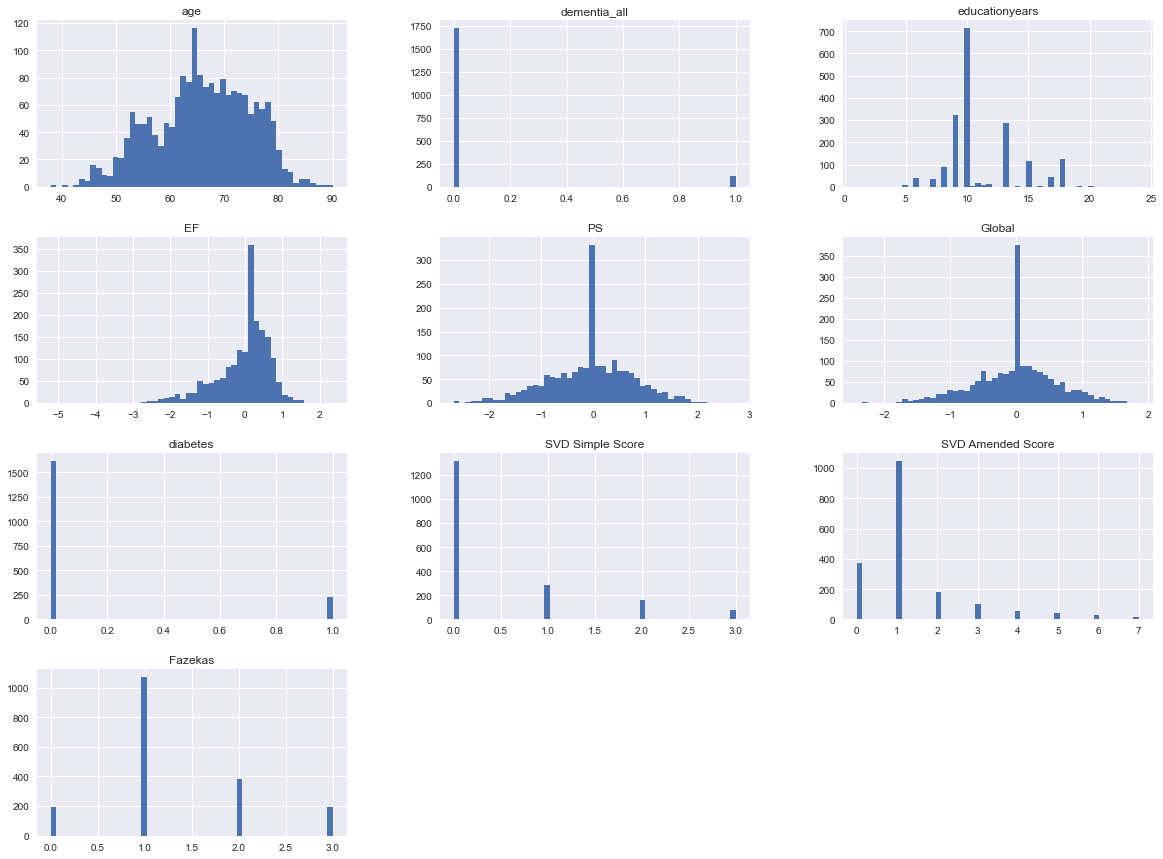

In [23]:
# visualizing the numerical columns
#histogram for each numerical columns
di.hist(bins=50, figsize=(20,15))
plt.show()

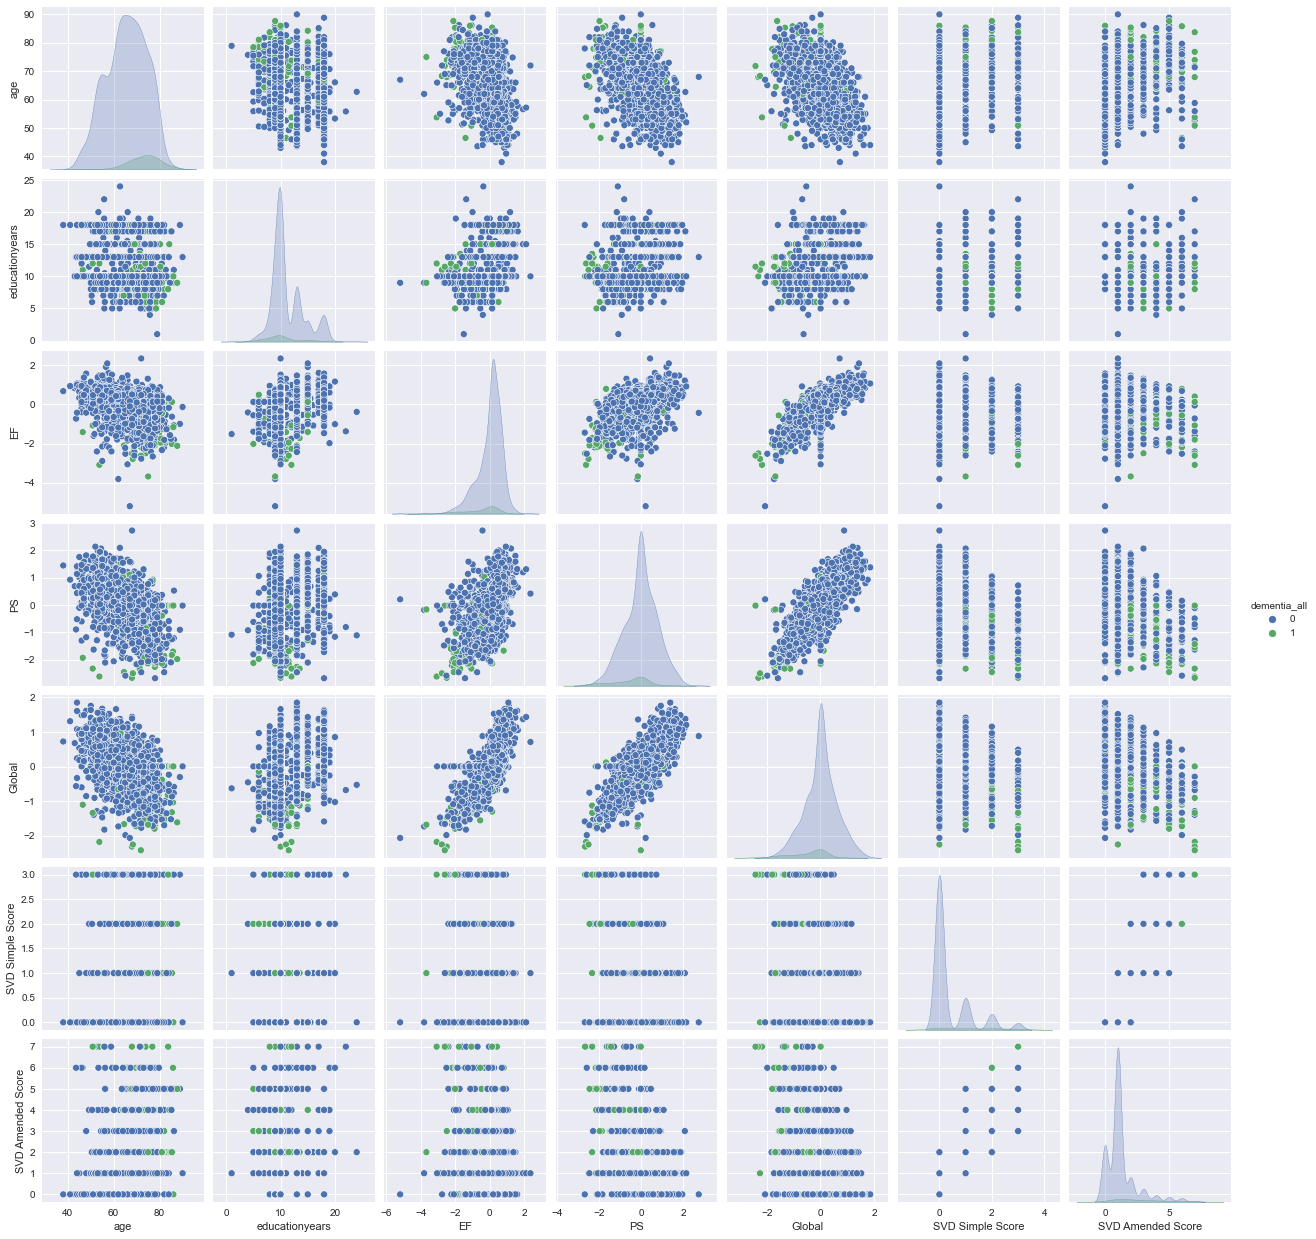

In [24]:
#Pairplot
nums = ["age", "educationyears", "EF", "PS", "Global", "SVD Simple Score", "SVD Amended Score"]
sns.pairplot(di, vars=nums, hue="dementia_all")
plt.show()

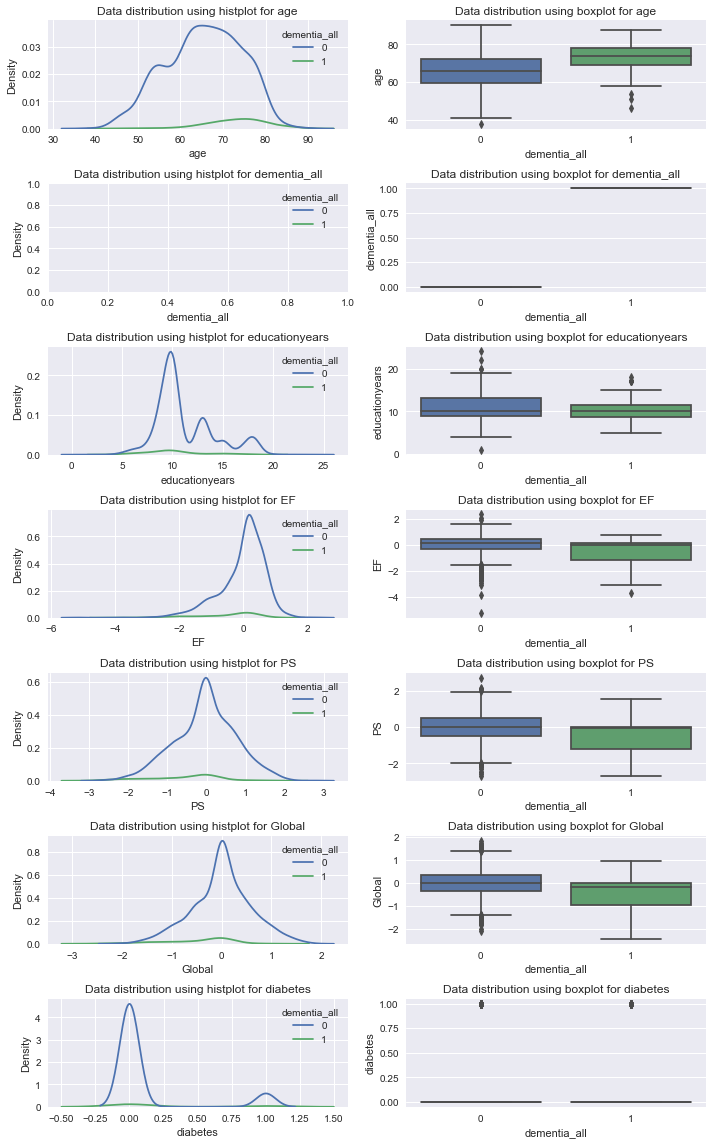

In [25]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 16))
nums = di.select_dtypes(include=['float64', 'int64']).columns

for i, j in enumerate(nums[:7]):  # Limiting the iteration to the first 7 numerical columns
    sns.kdeplot(data=di, x=j, hue="dementia_all", ax=axes[i][0])
    sns.boxplot(data=di, x="dementia_all", y=j, ax=axes[i][1])
    axes[i][0].set_title("Data distribution using histplot for " + str(j))
    axes[i][1].set_title("Data distribution using boxplot for " + str(j))
    
plt.tight_layout()
plt.show()


# BIVARIATE ANALYSIS

An analysis of the features against the target variable was also generated in order to understand the relationship between all the indicators and the target variable dementia_all and it was obvious that there was a direct relationship between some indicators and the target variable

In [26]:
from sklearn.preprocessing import LabelEncoder
categoricals = ["gender", "smoking", "hypertension", "hypercholesterolemia", "lacunes_num",
               "fazekas_cat", "study", "lac_count", "CMB_count"]

le = LabelEncoder()
for i in categoricals:
    di[i] = le.fit_transform(di[i])

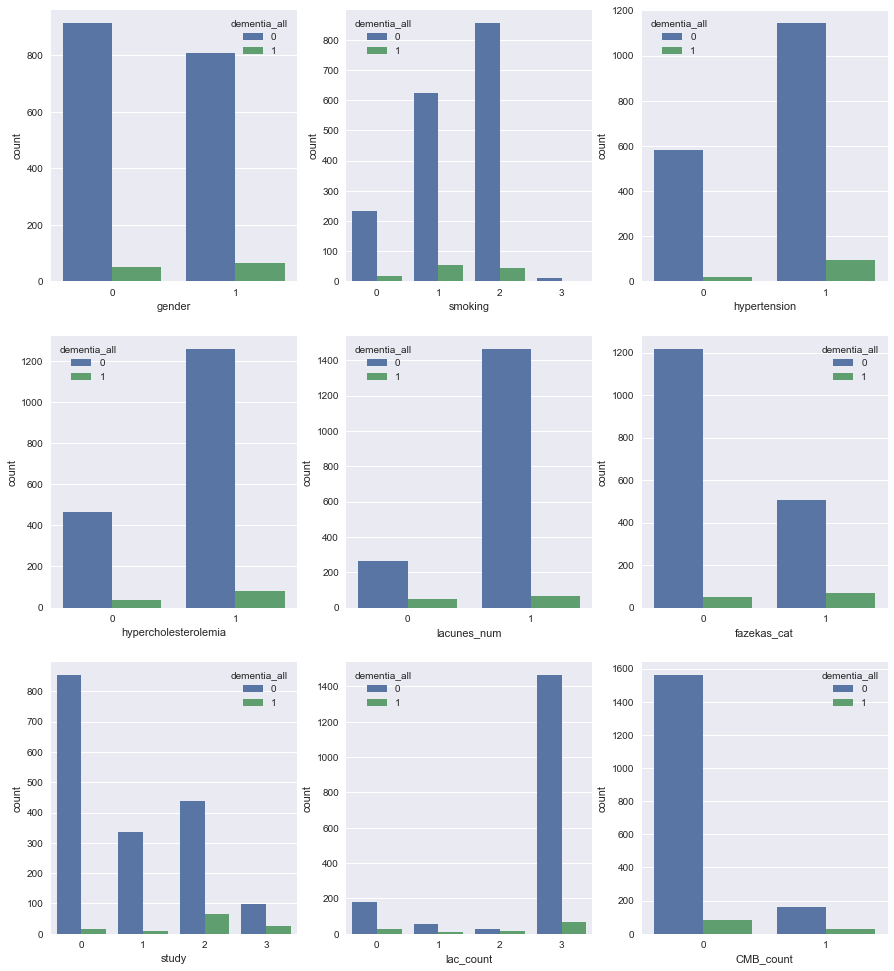

In [27]:
# Visualizing the categorical columns
categoricals =  ["gender", "smoking", "hypertension", "hypercholesterolemia", "lacunes_num",
               "fazekas_cat", "study", "lac_count", "CMB_count"]

fig, ax = plt.subplots(3, 3, figsize = (15, 17))
for i, col in enumerate(categoricals):
    sns.countplot(x=col, data=di, ax=ax[i // 3, i % 3], hue = "dementia_all")
plt.show()

Explained variance ratio: [0.2960378  0.13885593 0.08216736 0.06586916 0.06325947 0.05302555
 0.0507753  0.04814095 0.04722382 0.0377162  0.03321843 0.02973536
 0.02379302 0.01079062 0.00823817 0.0060931  0.00380725 0.00125251]


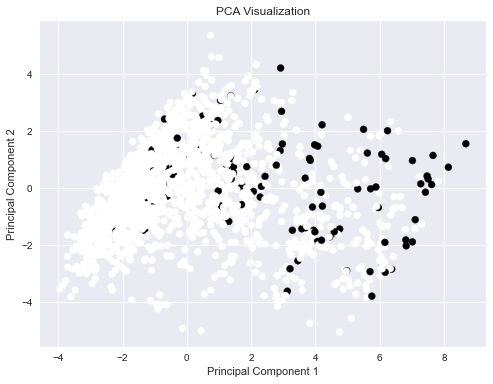

Accuracy: 0.926829268292683
Precision: 0.25
Recall: 0.04
F1-score: 0.06896551724137932


In [28]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
di 

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(di.drop('dementia_all', axis=1))

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Number of principal components to retain
n_components = 7
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

# Visualize the data in the reduced feature space
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=di['dementia_all'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

# Use the reduced feature set for further analysis or modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, di['dementia_all'], test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Explained variance ratio: [0.2960378  0.13885593 0.08216736 0.06586916 0.06325947 0.05302555
 0.0507753  0.04814095 0.04722382 0.0377162  0.03321843 0.02973536
 0.02379302 0.01079062 0.00823817 0.0060931  0.00380725 0.00125251]
Feature Importance (Loadings):
                           PC1       PC2       PC3
Global               -0.566297 -0.679729 -0.288444
EF                   -0.461336 -0.594484 -0.328636
PS                   -0.562884 -0.581536 -0.209420
age                   0.482654  0.491500 -0.171154
educationyears       -0.172250 -0.417847 -0.031982
lacunes_num          -0.749693  0.328990 -0.182605
lac_count            -0.662062  0.324076 -0.194218
hypertension          0.363810  0.219310 -0.058040
SVD Amended Score     0.869832 -0.280743 -0.070265
diabetes              0.189353  0.172566  0.152855
study                 0.539533 -0.316909  0.256326
SVD Simple Score      0.861350 -0.367845 -0.096361
gender                0.092661 -0.267808  0.515506
smoking              -0.090

<Figure size 864x432 with 0 Axes>

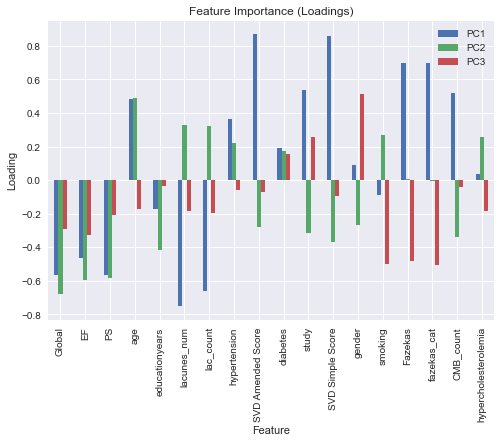

In [29]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
di 

# Standardize the features
X = di.drop('dementia_all', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Number of principal components to retain
n_components = 3
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

# Get the loading of each feature on the principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a dataframe to store the loadings
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(n_components)], index=X.columns)

# Sort the loadings by the absolute value
loadings_df = loadings_df.reindex(loadings_df.sum(axis=1).abs().sort_values(ascending=False).index, axis=0)

# Print the sorted loadings
print("Feature Importance (Loadings):")
print(loadings_df)

# Visualize the feature importance
plt.figure(figsize=(12, 6))
loadings_df.plot(kind='bar')
plt.title('Feature Importance (Loadings)')
plt.xlabel('Feature')
plt.ylabel('Loading')
plt.xticks(rotation=90)
plt.show()

A correlation heatmap was also generated in order to understand the correlation that exists between the numerical columns in the dataset, and this showed how closely related these numerical columns are to different outcomes for imbalanced and balanced dementia_all outcome

In [30]:
#Undersampling the target variable wich is Heart Disease
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = di['dementia_all'] # target variable

# Separate majority and minority classes
majority_class = di[y == 0]
minority_class = di[y == 1]

# Undersample majority class
undersampled_majority = resample(majority_class,
                                 replace=False, # sampling without replacement
                                 n_samples=len(minority_class), # set the number of samples to match the minority class
                                 random_state=42) # for reproducibility

# Combine minority class and undersampled majority class
undersampled_di = pd.concat([minority_class, undersampled_majority])

# Shuffle the data
undersampled_di = undersampled_di.sample(frac=1, random_state=42)

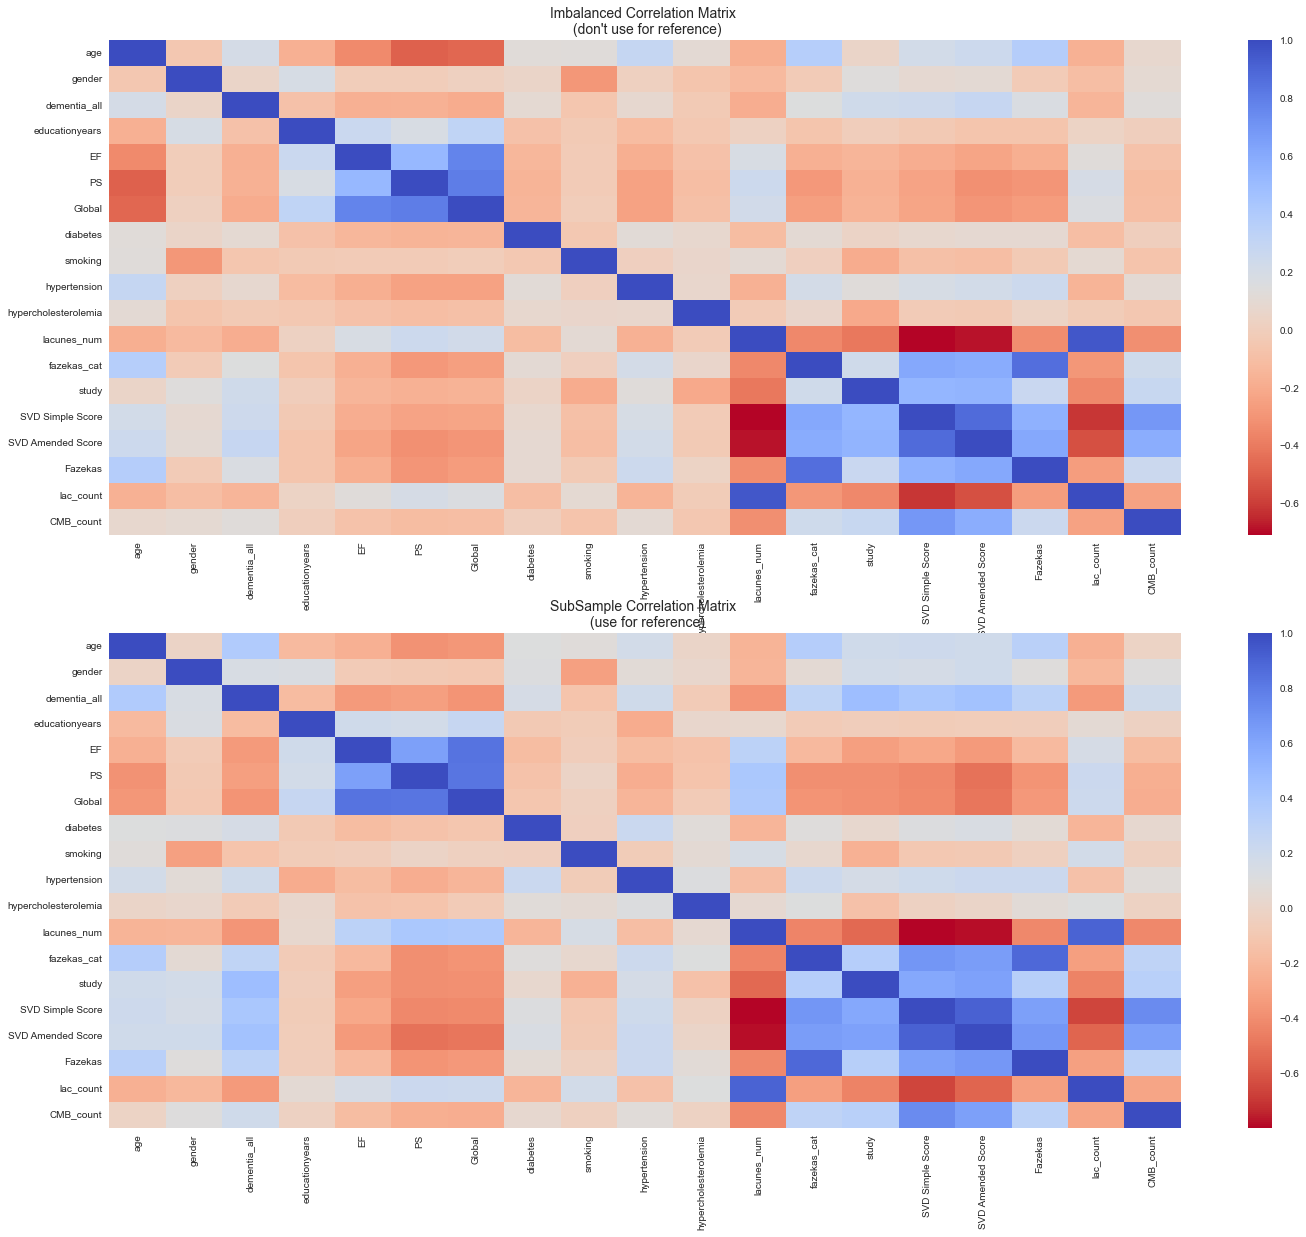

In [31]:
# Make sure we use the subsample in our correlation
#Plotting the correlation matrix for the numerical columns
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = di.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = undersampled_di.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

# FEATURE ENGINEERING

Encoding was used to convert the categorical variables into numerical variable in preparation for the implementation of the various models. 

In [32]:
di

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,52.67,1,0,11.0,-2.403333,-1.290000,-1.287000,0,0,1,1,0,1,3,3.0,7.0,3,2,1
1,64.58,1,0,10.0,1.280000,0.360000,0.744000,0,1,1,1,0,0,3,2.0,3.0,1,0,1
2,74.92,1,0,8.0,-1.440000,-1.520000,-0.922000,0,2,1,1,0,0,3,1.0,2.0,1,0,0
3,74.83,1,1,9.0,0.130000,-2.136271,-1.301102,0,0,1,1,0,1,3,2.0,4.0,2,1,0
4,79.25,1,0,10.0,-0.920000,-1.493333,-0.924000,0,1,1,1,0,1,3,2.0,3.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,67.00,0,0,13.0,-0.100000,-0.020000,-0.260000,0,2,1,1,1,0,0,0.0,1.0,0,3,0
1838,71.00,0,0,13.0,-0.370000,-1.060000,-1.003333,0,2,1,1,1,0,0,0.0,1.0,1,3,0
1839,55.00,1,0,10.0,0.460000,0.960000,0.610000,0,1,0,1,1,0,0,0.0,0.0,0,3,0
1840,54.00,1,0,10.0,0.190000,0.030000,0.590000,0,1,0,1,1,0,0,0.0,0.0,1,3,0


The dataset was now split into training and testing sets by importing the ‘train_test_split’ library. The test size parameter was then set to ‘0.2’, that is 20% of the data being used for the testing set and 80% being used for the training set.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,f1_score

In [34]:
#Splitting the data to Train and Test
#Splitting into training set and test set
#80% training and 20% test
from sklearn.model_selection import train_test_split,KFold
x = di.drop('dementia_all', axis = 1)#features
y = di['dementia_all']#target variable
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

Scaling the numerical features was required to produce good results because some of the algorithms used for this project, that is logistic regression requires data scaling to function properly without noisy data and to produce excellent results.

In [35]:
#standardizing the data using Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train_scaler = pd.DataFrame(x_train_scaler, columns=x.columns)
x_test_scaler = pd.DataFrame(x_test_scaler, columns=x.columns)
display(x_train_scaler.head())
display(x_test_scaler.head())

,age,gender,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,-2.018237,-0.933630,-0.378507,0.113630,-0.151331,-0.165541,-0.371928,-1.877987,0.709268,0.624198,0.444478,-0.672802,0.063263,-0.560269,-1.001461,-1.634964,0.425409,-0.340454
1,-0.444013,-0.933630,-0.378507,0.370113,-0.201108,0.511899,-0.371928,0.886905,-1.409904,-1.602057,0.444478,-0.672802,-0.938736,-0.560269,-0.233153,-0.388431,0.425409,-0.340454
2,-1.444700,-0.933630,1.291277,0.954368,1.033125,0.589016,-0.371928,-0.495541,-1.409904,0.624198,0.444478,-0.672802,1.065262,-0.560269,-0.233153,-0.388431,0.425409,-0.340454
3,0.699520,-0.933630,-1.046421,0.235122,0.047778,0.049519,-0.371928,0.886905,0.709268,0.624198,-2.249829,-0.672802,1.065262,0.675175,0.535156,-0.388431,-2.616473,-0.340454
4,0.852833,1.071088,-1.046421,-1.515503,-1.070182,-1.139849,-0.371928,-0.495541,0.709268,0.624198,0.444478,1.486321,1.065262,0.675175,1.303464,2.104635,0.425409,-0.340454


,age,gender,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,0.230655,1.071088,2.293148,0.383613,-1.694425,-0.622544,-0.371928,0.886905,-1.409904,-1.602057,0.444478,-0.672802,-0.938736,-0.560269,-0.233153,-0.388431,0.425409,-0.340454
1,1.467545,-0.933630,2.293148,-0.399336,-1.159320,-0.746203,-0.371928,0.886905,0.709268,0.624198,-2.249829,1.486321,-0.938736,-0.560269,-0.233153,2.104635,-1.602512,-0.340454
2,-0.668902,1.071088,-0.712464,0.721091,1.093100,1.248480,-0.371928,-0.495541,-1.409904,0.624198,0.444478,-0.672802,-0.938736,0.675175,-0.233153,-0.388431,0.425409,2.937252
3,-0.781346,-0.933630,-0.378507,0.586099,0.632661,1.528058,-0.371928,0.886905,0.709268,0.624198,0.444478,-0.672802,-0.938736,-0.560269,-1.001461,-1.634964,0.425409,-0.340454
4,-0.228119,1.071088,2.627105,0.046135,0.354738,0.562975,-0.371928,-0.495541,0.709268,0.624198,-2.249829,1.486321,2.067261,0.675175,2.071772,0.858102,-1.602512,-0.340454


After scaling the dataset, the shape of the train and test set was printed in order to get an overview of the dataset.

In [36]:
# checking the shape of the train and test datasets

print("The shape of x_train_scaler is: ",x_train_scaler.shape)
print("The shape of x_test_scaler is: ",x_test_scaler.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train_scaler is:  (1473, 18)
The shape of x_test_scaler is:  (369, 18)
The shape of y_train is:  (1473,)
The shape of y_test is:  (369,)


The baseline model was also created to serve as a point of reference for the performance other models that they will also be trained on the train and test set.

In [37]:
from sklearn.dummy import DummyClassifier
base = DummyClassifier(strategy = "constant", constant = 0)
base.fit(x_train_scaler, y_train)
y_pred_base = base.predict(x_test_scaler)

print(f"Your baseline model achieves accuracy = {accuracy_score(y_test, y_pred_base)}")
print(f"Your baseline model achieves f1 = {f1_score(y_test, y_pred_base)}")
print(f"Your baseline model achieves roc_auc = {roc_auc_score(y_test, y_pred_base)}")

Your baseline model achieves accuracy = 0.943089430894309
Your baseline model achieves f1 = 0.0
Your baseline model achieves roc_auc = 0.5


In [100]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVC  # Import SVC
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier  # Import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
import numpy as np
from sklearn.linear_model import LogisticRegression





# Define the hyperparameter search space for each model
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

mlp_param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 64)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

gbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]

}

# Instantiate each model
dt = DecisionTreeClassifier(random_state=32)
lr = LogisticRegression(random_state=32)
rf = RandomForestClassifier(random_state=32)
gnb = GaussianNB()
svc = SVC(random_state=32)
mlp = MLPClassifier(random_state=32)
gbm = GradientBoostingClassifier(random_state=32)


# Wow our scores are getting even high scores even when applying cross validation.
classifiers = {
    'Decision Tree': dt,
    'Logistic Regression': lr,
    'Random Forest': rf,
    'Gaussian NB': gnb,
    'Support Vector Classifier': svc,
    'Multi-Layer Perceptron': mlp,
    'Gradient Boosting Classifier': gbm
    
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  DecisionTreeClassifier Has a training score of 95.0 % accuracy score
Classifiers:  LogisticRegression Has a training score of 75.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 98.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 68.0 % accuracy score
Classifiers:  SVC Has a training score of 73.0 % accuracy score
Classifiers:  MLPClassifier Has a training score of 83.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 90.0 % accuracy score


In [101]:
# Overfitting Case

log_reg_score = cross_val_score(lr, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


dt_score = cross_val_score(dt, X_train, y_train, cv=5)
print('DecisionTreeClassifier Cross Validation Score', round(dt_score.mean() * 100, 2).astype(str) + '%')

rf_score = cross_val_score(rf, X_train, y_train, cv=5)
print('RandomForestClassifier Cross Validation Score', round(rf_score.mean() * 100, 2).astype(str) + '%')

gnb_score = cross_val_score(gnb, X_train, y_train, cv=5)
print('GaussianNB Cross Validation Score', round(gnb_score.mean() * 100, 2).astype(str) + '%')

# Calculating cross-validation scores for the rest of the classifiers
mlp_score = cross_val_score(mlp, X_train, y_train, cv=5)
print('Multi-Layer Perceptron Cross Validation Score:', round(mlp_score.mean() * 100, 2), '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score:', round(svc_score.mean() * 100, 2), '%')

gbm_score = cross_val_score(gbm, X_train, y_train, cv=5)
print('Gradient Boosting Classifier Cross Validation Score:', round(gbm_score.mean() * 100, 2), '%')




Logistic Regression Cross Validation Score:  74.74%
DecisionTreeClassifier Cross Validation Score 95.47%
RandomForestClassifier Cross Validation Score 97.51%
GaussianNB Cross Validation Score 67.59%
Multi-Layer Perceptron Cross Validation Score: 82.84 %
Support Vector Classifier Cross Validation Score: 73.06 %
Gradient Boosting Classifier Cross Validation Score: 90.31 %


# MODEL IMPLEMENTATION

The models were then implemented and the were run on both the training and testing set, with their training and testing accuracy visualised with a horizontal bar chart. 

In [104]:
# Define the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
mlp = MLPClassifier()
svc = SVC()
gbm = GradientBoostingClassifier()


# Add OSDM to the model list
model_list = [lr, dt, rf, gnb, mlp, svc, gbm]

# Define the model names
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'Multi-Layer Perceptron', 'Support Vector Classifier', 'Gradient Boosting Classifier']

train_acc = []
test_acc = []

for model in model_list:
    model.fit(x_train_scaler, y_train)
    y_train_pred = model.predict(x_train_scaler)
    y_test_pred = model.predict(x_test_scaler)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    
# Visualizing the train model accuracy 
plt.figure(figsize=(10, 6))
sns.barplot(y=model_names, x=train_acc, palette="Blues_d")
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Train Model Accuracy')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1473, 2209]

The performance of the classification models was compared using evaluation metrics such as precision, accuracy, f1-score and the predicted values for both the training and testing set using the confusion matrix and a classification report shown in the code below. A confusion matrix was generated for both training and testing set, plotting the false and true positives as well as the false and true negatives.

In [41]:
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gaussian Naive Bayes': gnb,
    'Multi-Layer Perceptron': mlp,
    'Support Vector Classifier': svc,
    'Gradient Boosting Classifier': gbm,
    
}

# Loop through the classifiers and fit them before prediction
for name, clf in classifiers.items():
    clf.fit(x_train_scaler, y_train)

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(x_test_scaler)
    print(classification_report(y_test, y_pred))

# Print confusion matrix for each model
for name, clf in classifiers.items():
    y_pred = clf.predict(x_test_scaler)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix - {name}:\n{cm}\n")


Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       348
           1       0.25      0.05      0.08        21

    accuracy                           0.94       369
   macro avg       0.60      0.52      0.52       369
weighted avg       0.91      0.94      0.92       369

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       348
           1       0.10      0.10      0.10        21

    accuracy                           0.90       369
   macro avg       0.52      0.52      0.52       369
weighted avg       0.90      0.90      0.90       369

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       348
           1       0.60      0.14      0.23        21

    accuracy                           0.95       369
  

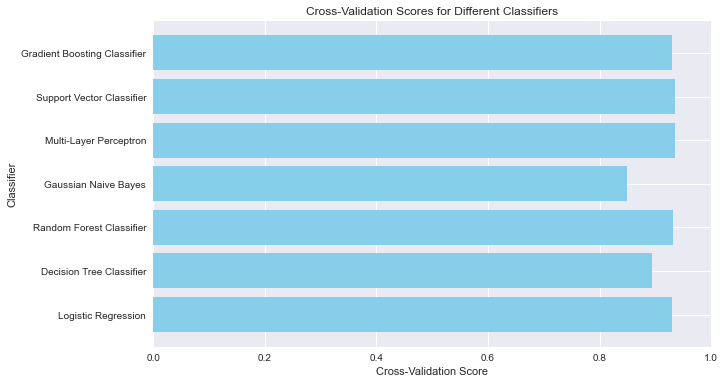

In [73]:
import matplotlib.pyplot as plt

# Define the classifiers and their corresponding cross-validation scores
classifiers = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'Multi-Layer Perceptron', 'Support Vector Classifier', 'Gradient Boosting Classifier']
cv_scores = [log_reg_score.mean(), dt_score.mean(), rf_score.mean(), gnb_score.mean(), mlp_score.mean(), svc_score.mean(), gbm_score.mean()]

# Visualize the cross-validation scores using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(classifiers, cv_scores, color='skyblue')
plt.xlabel('Cross-Validation Score')
plt.ylabel('Classifier')
plt.title('Cross-Validation Scores for Different Classifiers')
plt.xlim(0.0, 1.0)  # Limit the x-axis to values between 0 and 1 for accuracy
plt.show()


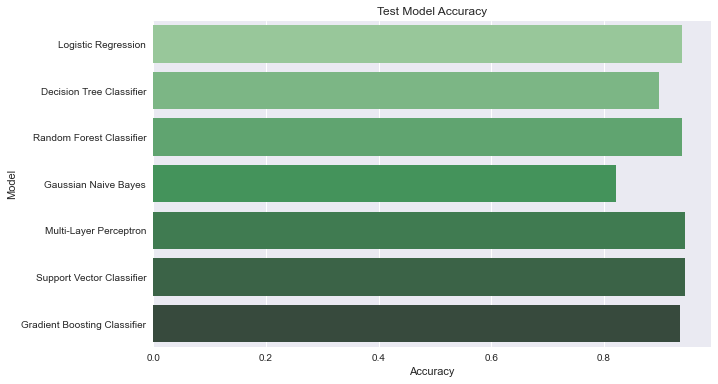

In [43]:
# Visualizing the test model accuracy 
plt.figure(figsize=(10, 6))
sns.barplot(y=model_names, x=test_acc, palette="Greens_d")
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Test Model Accuracy')
plt.show()


A summary of the training and testing accuracies were also printed and visualised showing the accuracies of all the models with random forest classifier and logistic regression being the better performing models.

In [44]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
svc = SVC()
mlp = MLPClassifier()
gbm = GradientBoostingClassifier()





model_dict = {'Model':model_list,'Train Score':train_acc,'Test Score':test_acc}
model_dict

{'Model': [LogisticRegression(),
  DecisionTreeClassifier(),
  RandomForestClassifier(),
  GaussianNB(),
  MLPClassifier(),
  SVC(),
  GradientBoostingClassifier()],
 'Train Score': [0.9375424304141209,
  1.0,
  1.0,
  0.8499660556687033,
  0.957909029192125,
  0.9422946367956552,
  0.9646978954514596],
 'Test Score': [0.9376693766937669,
  0.8970189701897019,
  0.9376693766937669,
  0.8211382113821138,
  0.943089430894309,
  0.943089430894309,
  0.9349593495934959]}

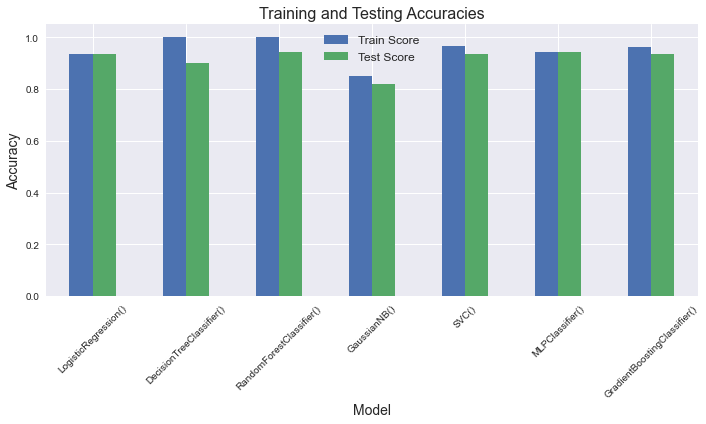

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the model_dict
model_dict = {'Model': ['LogisticRegression()',
                        'DecisionTreeClassifier()',
                        'RandomForestClassifier()',
                        'GaussianNB()',
                        'SVC()',
                        'MLPClassifier()',
                        'GradientBoostingClassifier()'
                        ],
              'Train Score': [0.9375424304141209,
                              1.0,
                              1.0,
                              0.8499660556687033,
                              0.9674134419551935,
                              0.9422946367956552,
                              0.9646978954514596
                              ],
              'Test Score': [0.9376693766937669,
                             0.9024390243902439,
                             0.943089430894309,
                             0.8211382113821138,
                             0.9376693766937669,
                             0.943089430894309,
                             0.9349593495934959
                             ]}

# Create a DataFrame from the dictionary
model_df = pd.DataFrame(model_dict)

# Visualize the data
fig, ax = plt.subplots(figsize=(10, 6))
model_df.set_index('Model').plot(kind='bar', ax=ax)
ax.set_title('Training and Testing Accuracies', fontsize=16)
ax.legend(fontsize=12)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A ROC curve was also generated and displayed in a single plot displaying the false positive and true positive rates in the curve using the actual test labels, that is the ‘y_test’ and the predicted probabilities ‘y_pred_prob’ as inputs for the curve.

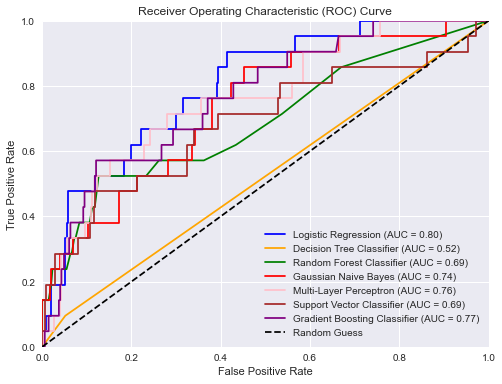

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
mlp = MLPClassifier()
svc = SVC(probability=True)
gbm = GradientBoostingClassifier()


# Create the list of models
model_list = [lr, dt, rf, gnb, mlp, svc, gbm]

# Define model names
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 
               'Gaussian Naive Bayes', 'Multi-Layer Perceptron', 'Support Vector Classifier', 
               'Gradient Boosting Classifier']

# Define colors
colors = ['blue', 'orange', 'green', 'red', 'pink', 'brown', 'purple']

plt.figure(figsize=(8, 6))
for i, model in enumerate(model_list):
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        model.fit(x_train_scaler, y_train)
        y_pred_prob = model.predict_proba(x_test_scaler)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# MODEL PERFORMANCE ENHANCEMENT

In order to improve the performance of the models, performance enhancement techniques such as undersampling and Oversampling, Stratified K cross validation as well as hyperparameter tuning were employed so as to address the issue of imbalance in the target variable as well in improve on the performance of the models.

# APPLYING UNDERSAMPLING TECHNIQUE 

Undersampling was applied to the target variable in order to avoid bias in the predictions of the models.The shape of the undersampled set was also printed to get an overview of the resampled set.

In [47]:

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = di['dementia_all'] # target variable

# Separate majority and minority classes
majority_class = di[y == 0]
minority_class = di[y == 1]

# Undersample majority class
undersampled_majority = resample(majority_class,
                                 replace=False, # sampling without replacement
                                 n_samples=len(minority_class), # set the number of samples to match the minority class
                                 random_state=42) # for reproducibility

# Combine minority class and undersampled majority class
undersampled_di = pd.concat([minority_class, undersampled_majority])

# Shuffle the data
undersampled_di = undersampled_di.sample(frac=1, random_state=42)

# Split into training and testing sets
x = undersampled_di.drop('dementia_all', axis=1) # feature variables
y = undersampled_di['dementia_all'] # target variable
x_train_scaled, x_test_scaled, y_train_resampled, y_test_resampled = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the training and testing data separately
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_scaled)
x_test_scaled = scaler.transform(x_test_scaled)

# Convert the scaled arrays to Pandas DataFrames with feature names
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)

# Print the shapes of the new datasets
print("Shape of undersampled_di:", undersampled_di.shape)
print("Shape of X_train_scaled:", x_train_scaled.shape)
print("Shape of X_test_scaled:", x_test_scaled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Shape of y_test_resampled:", y_test_resampled.shape)


Shape of undersampled_di: (232, 19)
Shape of X_train_scaled: (185, 18)
Shape of X_test_scaled: (47, 18)
Shape of y_train_resampled: (185,)
Shape of y_test_resampled: (47,)


After undersampling was applied to the target variable, it was visualized to see the effect that undersampling had on the target variable and it was obvious that there was no issue of clas imbalance in the target variable any longer.

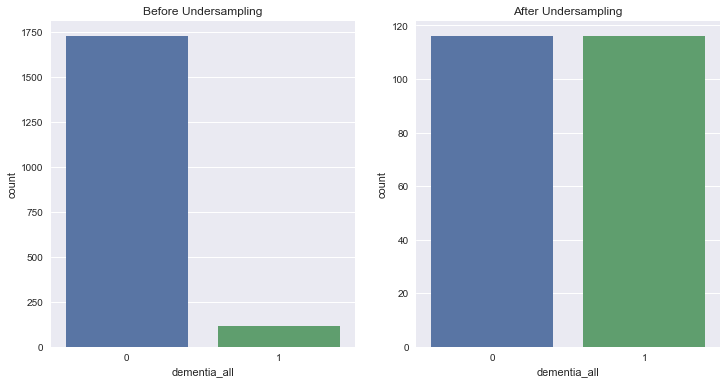

In [48]:

# Plot distribution of target variable before and after undersampling
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.countplot(data=di, x='dementia_all', ax=axs[0])
axs[0].set_title('Before Undersampling')
sns.countplot(data=undersampled_di, x='dementia_all', ax=axs[1])
axs[1].set_title('After Undersampling')
plt.show()

# APPLYING OVERSAMPLING TECHNIQUE 


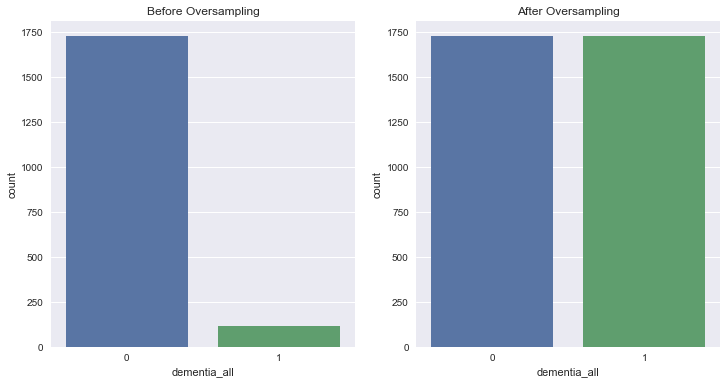

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axes
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Plot original distribution
sns.countplot(data=di, x='dementia_all', ax=axs[0])
axs[0].set_title('Before Oversampling')

# Separate majority and minority classes 
y = di['dementia_all']
majority_class = di[y == 0]
minority_class = di[y == 1]

# Oversample minority class
minority_oversampled = resample(minority_class,  
                                 replace=True,
                                 n_samples=len(majority_class),
                                 random_state=42)

# Combine original majority class with oversampled minority class
oversampled_di = pd.concat([majority_class, minority_oversampled])

# Plot distribution after oversampling  
sns.countplot(data=oversampled_di, x='dementia_all', ax=axs[1])
axs[1].set_title('After Oversampling')

# Show plot
plt.show()

In [50]:
from sklearn.model_selection import KFold, cross_val_score




# Create a list of models
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42),
    MLPClassifier(random_state=42),
    SVC(random_state=42),
    GradientBoostingClassifier(random_state=42),
      
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, x_train_scaled, y_train_resampled, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")


Accuracy for DecisionTreeClassifier: [0.64864865 0.64864865 0.78378378 0.59459459 0.59459459]
Average accuracy for DecisionTreeClassifier: 0.6540540540540541

Accuracy for RandomForestClassifier: [0.7027027  0.7027027  0.75675676 0.62162162 0.72972973]
Average accuracy for RandomForestClassifier: 0.7027027027027027

Accuracy for GaussianNB: [0.64864865 0.81081081 0.78378378 0.62162162 0.64864865]
Average accuracy for GaussianNB: 0.7027027027027027

Accuracy for LogisticRegression: [0.72972973 0.7027027  0.72972973 0.64864865 0.75675676]
Average accuracy for LogisticRegression: 0.7135135135135136

Accuracy for MLPClassifier: [0.78378378 0.64864865 0.72972973 0.72972973 0.67567568]
Average accuracy for MLPClassifier: 0.7135135135135136

Accuracy for SVC: [0.81081081 0.64864865 0.75675676 0.67567568 0.67567568]
Average accuracy for SVC: 0.7135135135135136

Accuracy for GradientBoostingClassifier: [0.62162162 0.7027027  0.72972973 0.67567568 0.7027027 ]
Average accuracy for GradientBoostin

In [51]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



# Create a list of models
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    MLPClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
   
]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model in models:
    cv_results = cross_val_score(model, x_train_scaled, y_train_resampled, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")

Accuracy for DecisionTreeClassifier: [0.64864865 0.64864865 0.78378378 0.59459459 0.59459459]
Average accuracy for DecisionTreeClassifier: 0.6540540540540541

Accuracy for RandomForestClassifier: [0.7027027  0.7027027  0.75675676 0.62162162 0.72972973]
Average accuracy for RandomForestClassifier: 0.7027027027027027

Accuracy for GaussianNB: [0.64864865 0.81081081 0.78378378 0.62162162 0.64864865]
Average accuracy for GaussianNB: 0.7027027027027027

Accuracy for LogisticRegression: [0.72972973 0.7027027  0.72972973 0.64864865 0.75675676]
Average accuracy for LogisticRegression: 0.7135135135135136

Accuracy for SVC: [0.81081081 0.64864865 0.75675676 0.67567568 0.67567568]
Average accuracy for SVC: 0.7135135135135136

Accuracy for MLPClassifier: [0.78378378 0.64864865 0.72972973 0.72972973 0.67567568]
Average accuracy for MLPClassifier: 0.7135135135135136

Accuracy for GradientBoostingClassifier: [0.62162162 0.7027027  0.72972973 0.67567568 0.7027027 ]
Average accuracy for GradientBoostin

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Define the hyperparameter search space for each model
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Instantiate each model
dt = DecisionTreeClassifier(random_state=32)
lr = LogisticRegression(random_state=32)
rf = RandomForestClassifier(random_state=32)
gnb = GaussianNB()

In [53]:

from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Define the hyperparameter search space for each model
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

mlp_param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 64)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

gbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}



models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    MLPClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
   
]


APPLYING STRATIFIED K-FOLD CROSS VALIDATION

Stratified K-fold cross validation was performed with on all the models. The ‘StratifiedKFold’ function was used in order to make sure that every fold contained the same proportion for each class just like the original dataset. The cross-validation results which are used to compare the testing accuracy for every model is displayed using a ‘boxplot’ printing out the training accuracy as well as the evaluation metrics for each model.




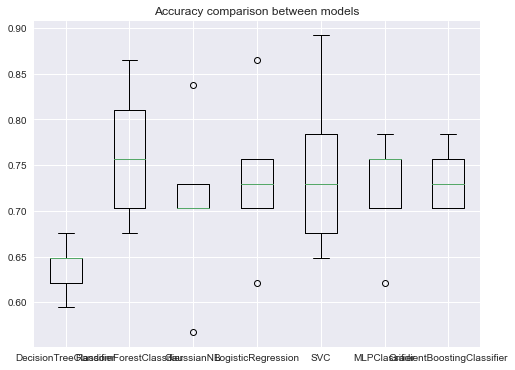

Training Accuracy for DecisionTreeClassifier: 1.000
Evaluation metrics for DecisionTreeClassifier:
Accuracy: 0.638
Precision: 0.640
Recall: 0.638
F1-score: 0.637
ROC AUC: 0.638

Training Accuracy for RandomForestClassifier: 1.000
Evaluation metrics for RandomForestClassifier:
Accuracy: 0.762
Precision: 0.769
Recall: 0.762
F1-score: 0.761
ROC AUC: 0.802

Training Accuracy for GaussianNB: 0.711
Evaluation metrics for GaussianNB:
Accuracy: 0.708
Precision: 0.725
Recall: 0.707
F1-score: 0.702
ROC AUC: 0.792

Training Accuracy for LogisticRegression: 0.780
Evaluation metrics for LogisticRegression:
Accuracy: 0.735
Precision: 0.740
Recall: 0.735
F1-score: 0.733
ROC AUC: 0.796

Training Accuracy for SVC: 0.857
Evaluation metrics for SVC:
Accuracy: 0.746
Precision: 0.748
Recall: 0.746
F1-score: 0.746
ROC AUC: 0.808

Training Accuracy for MLPClassifier: 0.935
Evaluation metrics for MLPClassifier:
Accuracy: 0.724
Precision: 0.730
Recall: 0.725
F1-score: 0.723
ROC AUC: 0.815

Training Accuracy fo

In [54]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt





# Create a list of models
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    MLPClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
    
]

# Perform Stratified k-fold cross-validation with k=5 for each model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro',
    'roc_auc': 'roc_auc'
}
results = {}
for model in models:
    cv_results = cross_validate(model, x_train_scaled, y_train_resampled, cv=skf, scoring=scoring, return_train_score=True) # add return_train_score=True
    results[model.__class__.__name__] = cv_results

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([results[model.__class__.__name__]['test_accuracy'] for model in models], labels=[model.__class__.__name__ for model in models])
ax.set_title('Accuracy comparison between models')
plt.show()

# Print the evaluation metrics
for model_name, model_results in results.items():
    print(f"Training Accuracy for {model_name}: {model_results['train_accuracy'].mean():.3f}")
    print(f"Evaluation metrics for {model_name}:")
    print(f"Accuracy: {model_results['test_accuracy'].mean():.3f}")
    print(f"Precision: {model_results['test_precision'].mean():.3f}")
    print(f"Recall: {model_results['test_recall'].mean():.3f}")
    print(f"F1-score: {model_results['test_f1'].mean():.3f}")
    print(f"ROC AUC: {model_results['test_roc_auc'].mean():.3f}\n")


A confusion matrix is generated for the models based on the resampled training set and the testing set which displays the true positive, false positive, true negative and false negative of the actual labels in the rows and the predicted labels in the columns.

In [55]:
from sklearn.metrics import confusion_matrix


    
for model_name, model_results in results.items():
    model = next(filter(lambda m: m.__class__.__name__ == model_name, models))
    y_pred = model.fit(x_train_scaled, y_train_resampled).predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix for {model_name}:")
    print(cm)
    print()

Confusion matrix for DecisionTreeClassifier:
[[169 179]
 [ 14   7]]

Confusion matrix for RandomForestClassifier:
[[117 231]
 [  3  18]]

Confusion matrix for GaussianNB:
[[348   0]
 [ 21   0]]

Confusion matrix for LogisticRegression:
[[  0 348]
 [  0  21]]

Confusion matrix for SVC:
[[  0 348]
 [  0  21]]

Confusion matrix for MLPClassifier:
[[  0 348]
 [  0  21]]

Confusion matrix for GradientBoostingClassifier:
[[ 70 278]
 [  2  19]]



The performance of models was summarised together with their training and testing accuracy and printed out for the sake of comparative analysis.

In [56]:
import pandas as pd

# Create a dictionary to store the results
accuracy_results = {'Model': [], 'Training Accuracy': [], 'Testing Accuracy': []}

# Iterate through each model and store the accuracy results
for model_name, model_results in results.items():
    accuracy_results['Model'].append(model_name)
    accuracy_results['Training Accuracy'].append(model_results['train_accuracy'].mean())
    accuracy_results['Testing Accuracy'].append(model_results['test_accuracy'].mean())

# Create a pandas dataframe from the accuracy results dictionary
accuracy_df = pd.DataFrame.from_dict(accuracy_results)

# Print the accuracy dataframe
print(accuracy_df)


                        Model  Training Accuracy  Testing Accuracy
0      DecisionTreeClassifier           1.000000          0.637838
1      RandomForestClassifier           1.000000          0.762162
2                  GaussianNB           0.710811          0.708108
3          LogisticRegression           0.779730          0.735135
4                         SVC           0.856757          0.745946
5               MLPClassifier           0.935135          0.724324
6  GradientBoostingClassifier           1.000000          0.735135


The training and testing accuracy of all the models was then visualized in a clustered bar chart to show a comparison of the accuracy of both resampled training set and testing set. And an observation drawn from this visualization is that GaussianNB and LogisticRegression were the model that performed better on both the resampled training set and the testing set as well.

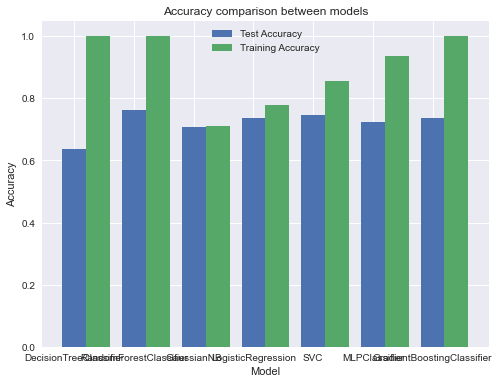

In [57]:
import matplotlib.pyplot as plt

# Extract the test accuracies for each model
test_accuracies = [results[model_name]['test_accuracy'].mean() for model_name in results]

# Extract the training accuracies for each model
train_accuracies = [results[model_name]['train_accuracy'].mean() for model_name in results]

# Create a bar chart to visualize the accuracies
fig, ax = plt.subplots(figsize=(8,6))
x_pos = [i for i in range(len(models))]
ax.bar(x_pos, test_accuracies, width=0.4, align='center', label='Test Accuracy')
ax.bar([i+0.4 for i in x_pos], train_accuracies, width=0.4, align='center', label='Training Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels([model.__class__.__name__ for model in models])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy comparison between models')
ax.legend()
plt.show()


Then a ROC curve was generated and displayed using the resampled training set and the testing set, with the false positive rate and the true positive rate as variables and the actual test labels and the predicted probabilities as input values

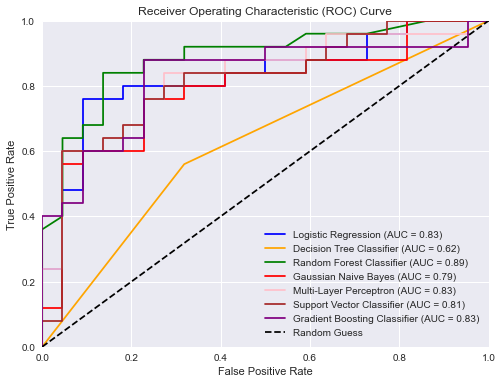

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

model_list = [lr, dt, rf, gnb, mlp, svc, gbm]

# Define model names
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 
               'Gaussian Naive Bayes', 'Multi-Layer Perceptron', 'Support Vector Classifier', 
               'Gradient Boosting Classifier']

# Define colors
colors = ['blue', 'orange', 'green', 'red', 'pink', 'brown', 'purple']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(x_train_scaled, y_train_resampled)
    y_pred_prob = model.predict_proba(x_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_prob)
    auc = roc_auc_score(y_test_resampled, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# FEATURE IMPORTANCE 

After random forest and Logistic regression were selected as the better performing models, a feature importance was generated using the random forest feature importance classifiers by displaying an array of values from 0 to 1 with a higher corresponding value indicating an important feature. This was done in order to figure out and understand the indicators that indeed play a key role in the prediction of dementia using the selected model. 

                 feature  importance
14     SVD Amended Score    0.823020
0                    age    0.702111
10           lacunes_num    0.618348
12                 study    0.604834
3                     EF   -0.515841
7                smoking   -0.420373
16             lac_count   -0.387037
11           fazekas_cat   -0.373892
6               diabetes    0.263268
8           hypertension    0.198507
15               Fazekas    0.197896
4                     PS    0.178211
2         educationyears   -0.162981
1                 gender   -0.155669
5                 Global   -0.090237
13      SVD Simple Score    0.090162
9   hypercholesterolemia    0.043211
17             CMB_count   -0.034496


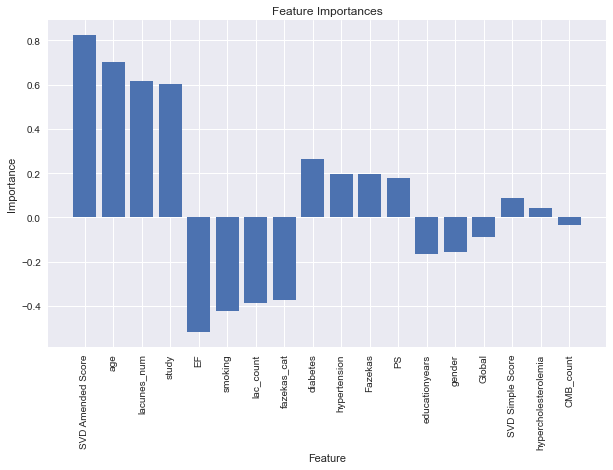

In [59]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
lr = LogisticRegression()
lr_model = lr.fit(x_train_scaled, y_train_resampled)

# Get feature coefficients
feature_importances = pd.DataFrame(
    {'feature': x_train_scaled.columns,
     'importance': lr_model.coef_[0]})

# Sort by importance (absolute value of coefficients)
feature_importances = feature_importances.sort_values('importance', ascending=False, key=abs)

# Print feature importances
print(feature_importances)

import matplotlib.pyplot as plt

# Plot importances
plt.figure(figsize=(10, 6))
plt.bar(x=feature_importances['feature'], height=feature_importances['importance'])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [60]:
rf=RandomForestClassifier()
rf_model=rf.fit(x_train_scaled,y_train_resampled)
feature_importances=rf_model.feature_importances_
print(feature_importances)

[0.13861663 0.01574038 0.06891249 0.13367988 0.09734563 0.11361191
 0.03689947 0.03804908 0.01654621 0.01810789 0.02140412 0.01747888
 0.11494276 0.04935873 0.06848468 0.02433558 0.01437218 0.01211352]


In [61]:
# If you have the original DataFrame 'df'
x_columns = di.columns.tolist()
x_columns


['age',
 'gender',
 'dementia_all',
 'educationyears',
 'EF',
 'PS',
 'Global',
 'diabetes',
 'smoking',
 'hypertension',
 'hypercholesterolemia',
 'lacunes_num',
 'fazekas_cat',
 'study',
 'SVD Simple Score',
 'SVD Amended Score',
 'Fazekas',
 'lac_count',
 'CMB_count']

                 feature  importance
0                    age    0.193785
5                 Global    0.112611
3                     EF    0.111621
4                     PS    0.102399
2         educationyears    0.092458
14     SVD Amended Score    0.063370
12                 study    0.047976
7                smoking    0.042869
13      SVD Simple Score    0.040443
15               Fazekas    0.031329
1                 gender    0.029411
9   hypercholesterolemia    0.028051
6               diabetes    0.023885
16             lac_count    0.023522
8           hypertension    0.021410
17             CMB_count    0.012065
10           lacunes_num    0.011627
11           fazekas_cat    0.011168


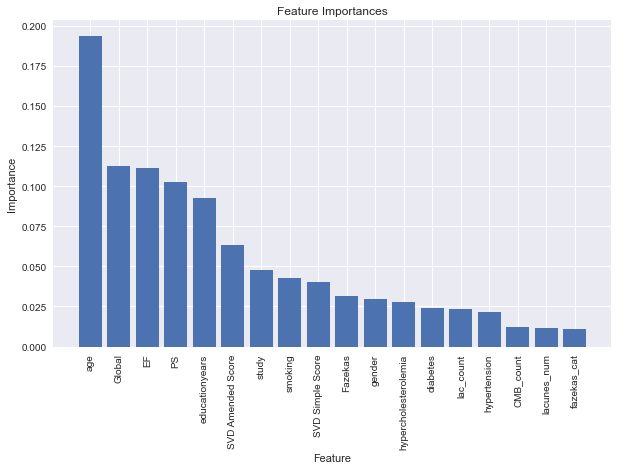

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Convert to dataframe
feature_importances = pd.DataFrame({'feature': x_train.columns, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print feature importances
print(feature_importances)

import matplotlib.pyplot as plt

# Plot importances
plt.figure(figsize=(10, 6))
plt.bar(x=feature_importances['feature'], height=feature_importances['importance'])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# LIME



In [63]:

!pip install lime
import lime
import lime.lime_tabular




# Split the data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a random forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_names=x_train.columns, class_names=['non-dementia', 'dementia'])

# Choose an instance from the test set to explain (you can adjust the index as needed)
instance_idx = 0

# Explain the prediction for the chosen instance
explanation = explainer.explain_instance(x_test.iloc[instance_idx], rf.predict_proba)

# Show explanation
explanation.show_in_notebook()

# SHAP Values (SHapley Additive exPlanations) break down a prediction to show the impact of each feature.

In [64]:
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your data is stored in variables X and y

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    eval_metric='logloss'          # evaluation metric
)

# Train the XGBoost model
xgb_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9186991869918699


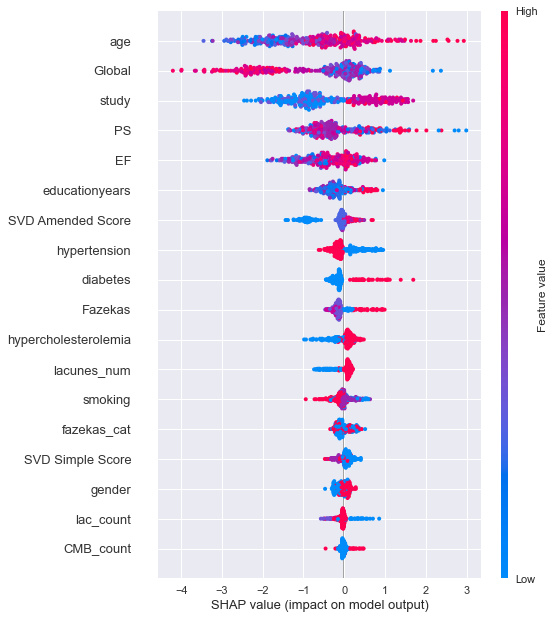

In [65]:
import shap
import xgboost as xgb

# Train your XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(x_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, x_test)


A bar chart was plotted to display the features that are important and can be considered as key indicators in the prediction of whether or not an individual has dementia. An observation that can be drawn from the visualisation is that age...

# LOGISTIC REGRESSION USING SMOTE DATA

In [66]:
!pip install imblearn
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
x = di.drop("dementia_all", axis=1).values
y = di.iloc[:, 2].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.1)
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No dementia', round(oversampled_di['dementia_all'].value_counts()[0]/len(oversampled_di) * 100,2), '% of the dataset')
print('dementia', round(oversampled_di['dementia_all'].value_counts()[1]/len(oversampled_di) * 100,2), '% of the dataset')

X = oversampled_di.drop('dementia_all', axis=1)
y = oversampled_di['dementia_all']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No dementia 50.0 % of the dataset
dementia 50.0 % of the dataset
Train: [ 346  347  348 ... 3449 3450 3451] Test: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  17

In [68]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

# Define the parameter grid for RandomizedSearchCV
log_reg_params = {"logisticregression__penalty": ['l1'], 'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialize stratified shuffle split
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Lists to append the scores and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

for train_idx, test_idx in sss.split(original_Xtrain, original_ytrain):
    # Define the pipeline with SMOTE and Logistic Regression
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), LogisticRegression(max_iter=100))
    
    # Train the model
    model = pipeline.fit(original_Xtrain[train_idx], original_ytrain[train_idx])
    
    # Make predictions
    prediction = model.predict(original_Xtrain[test_idx])
    
    # Calculate evaluation metrics
    accuracy_lst.append(accuracy_score(original_ytrain[test_idx], prediction))
    precision_lst.append(precision_score(original_ytrain[test_idx], prediction))
    recall_lst.append(recall_score(original_ytrain[test_idx], prediction))
    f1_lst.append(f1_score(original_ytrain[test_idx], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test_idx], prediction))

# Print the average evaluation metrics
print('---' * 45)
print('')
print("Accuracy:", np.mean(accuracy_lst))
print("Precision:", np.mean(precision_lst))
print("Recall:", np.mean(recall_lst))
print("F1 Score:", np.mean(f1_lst))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------

Accuracy: 0.7551537070524412
Precision: 0.7484757905014247
Recall: 0.7691911264584312
F1 Score: 0.7583747913437915
---------------------------------------------------------------------------------------------------------------------------------------


In [69]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Parameters
log_reg_params = {"penalty": ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

for train, test in sss.split(original_Xtrain, original_ytrain):
    
    LogisticRegression(max_iter=100)

prediction = pipeline.fit(
        original_Xtrain[train], original_ytrain[train]
    ).predict(original_Xtrain[test])
    
    # Scoring

# Calculate accuracy 

accuracy = accuracy_score(original_ytrain[test], prediction)


precision = precision_score(original_ytrain[test], prediction)
recall = recall_score(original_ytrain[test], prediction) 
f1 = f1_score(original_ytrain[test], prediction)
# Print 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.759493670886076
Precision: 0.7581227436823105
Recall: 0.7608695652173914
F1 Score: 0.759493670886076


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit

# Define a pipeline with logistic regression
pipeline = Pipeline([
    ('log_reg', LogisticRegression(max_iter=100))
])

# Parameters for randomized search
log_reg_params = {"log_reg__penalty": ['l1'], 'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialize stratified shuffle split
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Iterate over splits and perform training and evaluation
for train_idx, test_idx in sss.split(original_Xtrain, original_ytrain):
    # Split data
    X_train, X_test = original_Xtrain[train_idx], original_Xtrain[test_idx]
    y_train, y_test = original_ytrain[train_idx], original_ytrain[test_idx]
    
    # Train the model using the pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)


Accuracy: 0.7649186256781193
Precision: 0.7482993197278912
Recall: 0.7971014492753623
F1 Score: 0.7719298245614036
Accuracy: 0.7649186256781193
Precision: 0.7752808988764045
Recall: 0.7472924187725631
F1 Score: 0.761029411764706
Accuracy: 0.7739602169981917
Precision: 0.7714285714285715
Recall: 0.779783393501805
F1 Score: 0.7755834829443448
Accuracy: 0.7468354430379747
Precision: 0.7281879194630873
Recall: 0.7862318840579711
F1 Score: 0.7560975609756099
Accuracy: 0.7576853526220615
Precision: 0.7553956834532374
Recall: 0.7608695652173914
F1 Score: 0.7581227436823105


In [72]:
from sklearn.metrics import classification_report

# Fit the RandomizedSearchCV object to find the best estimator
rand_log_reg.fit(original_Xtrain, original_ytrain)

# Access the best estimator found during hyperparameter tuning
best_est = rand_log_reg.best_estimator_

# Define the labels for classification report
labels = ['dementia', 'No dementia']

# Make predictions using the best estimator
smote_prediction = best_est.predict(original_Xtest)

# Print the classification report
print(classification_report(original_ytest, smote_prediction, target_names=labels))



NameError: name 'rand_log_reg' is not defined